In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
import json
from pandas.io.json import json_normalize
from IPython.display import display
from pandas import HDFStore,DataFrame
import pandas as pd
import pickle

%matplotlib inline 

## Open files and read in inputs for dataset popularity

## These files contain all datasets that have been accessed in a given week 

- point 1. of google doc

https://docs.google.com/document/d/1G-Z2jDxHHz7b9xaOSx50cgiv72zZEBVA_QsqeU-c5Rg/edit

- Open weekly file with accessed datasets
- df_1w is a panda dataframe

https://pandas.pydata.org/pandas-docs/stable/10min.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [81]:
filename = '../Federica/DataPopularity_ML/simpleModel_start_2016-01-01_meas_7_pred_7'

df_1w = pd.read_hdf(filename+'.h5', 'X')

display(df_1w.shape)

(11302, 14)

In [211]:
#check what it looks like
display(df_1w.head(5)) 

,name,scope,user,taskid,cputime,pandaid,size,nfiles,site,walltime,nevents,dsid,ptag,type
0,data12_8TeV.00202712.physics_Bphysics.merge.DA...,data12_8TeV,1,1,7208,11,43389319013,13,1,13684,209256,202712,1425,DAOD_JPSIMUMU
1,data12_8TeV.00202740.physics_Bphysics.merge.DA...,data12_8TeV,1,1,1854,1,10751529386,3,1,2536,47044,202740,1425,DAOD_JPSIMUMU
2,data12_8TeV.00202798.physics_Bphysics.merge.DA...,data12_8TeV,1,1,10124,2,74054089517,21,1,14041,362970,202798,1425,DAOD_JPSIMUMU
3,data12_8TeV.00202965.physics_Bphysics.merge.DA...,data12_8TeV,1,1,3665,1,35363904915,11,1,5235,172378,202965,1425,DAOD_JPSIMUMU
4,data12_8TeV.00202987.physics_Bphysics.merge.DA...,data12_8TeV,1,1,2503,1,19718220347,6,1,3510,92535,202987,1425,DAOD_JPSIMUMU


In [14]:
display(df_1w.tail(5))

,name,scope,user,taskid,cputime,pandaid,size,nfiles,site,walltime,nevents,dsid,ptag,type
11297,mc15_13TeV.423107.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,1,2,10766,2,27316055812,10,2,18602,184000,423107,2459,DAOD_JETM4
11298,mc15_13TeV.423108.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,2,2,12203,3,29700860546,10,2,13559,199000,423108,2459,DAOD_JETM4
11299,mc15_13TeV.423109.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,1,2,12474,2,29539711120,8,2,14444,196600,423109,2459,DAOD_JETM4
11300,mc15_13TeV.423112.Pythia8EvtGen_A14NNPDF23LO_g...,mc15_13TeV,1,2,1534,2,8062768878,2,2,2543,195396,423112,2470,DAOD_SUSY7
11301,mc15_13TeV.426051.HerwigppEvtGen_UEEE5_CTEQ6L1...,mc15_13TeV,1,1,11756,2,24530679032,7,1,13621,418498,426051,2419,DAOD_SUSY1


In [15]:
#Explore the data
display(df_1w.columns)
display(df_1w.dtypes)
display(df_1w.values)

Index(['name', 'scope', 'user', 'taskid', 'cputime', 'pandaid', 'size',
       'nfiles', 'site', 'walltime', 'nevents', 'dsid', 'ptag', 'type'],
      dtype='object')

name        object
scope       object
user         int64
taskid       int64
cputime      int64
pandaid      int64
size         int64
nfiles       int64
site         int64
walltime     int64
nevents      int64
dsid         int64
ptag         int64
type        object
dtype: object

array([[ 'data12_8TeV.00202712.physics_Bphysics.merge.DAOD_JPSIMUMU.r4065_p1278_p1424_p1425_tid01261289_00',
        'data12_8TeV', 1, ..., 202712, 1425, 'DAOD_JPSIMUMU'],
       [ 'data12_8TeV.00202740.physics_Bphysics.merge.DAOD_JPSIMUMU.r4065_p1278_p1424_p1425_tid01261259_00',
        'data12_8TeV', 1, ..., 202740, 1425, 'DAOD_JPSIMUMU'],
       [ 'data12_8TeV.00202798.physics_Bphysics.merge.DAOD_JPSIMUMU.r4065_p1278_p1424_p1425_tid01261265_00',
        'data12_8TeV', 1, ..., 202798, 1425, 'DAOD_JPSIMUMU'],
       ..., 
       [ 'mc15_13TeV.423109.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP1500_2000.merge.DAOD_JETM4.e4453_s2726_r6869_r6282_p2459_tid07098125_00',
        'mc15_13TeV', 1, ..., 423109, 2459, 'DAOD_JETM4'],
       [ 'mc15_13TeV.423112.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP3000_inf.merge.DAOD_SUSY7.e4453_s2726_r6869_r6282_p2470_tid07168310_00',
        'mc15_13TeV', 1, ..., 423112, 2470, 'DAOD_SUSY7'],
       [ 'mc15_13TeV.426051.HerwigppEvtGen_UEEE5_CTEQ6L1_jetjet_JZ11W.merg

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f014c827748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f014c54c1d0>]], dtype=object)

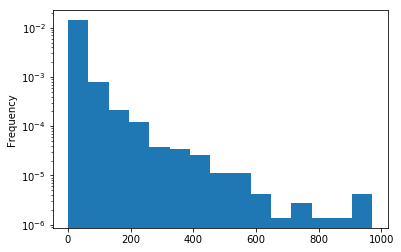

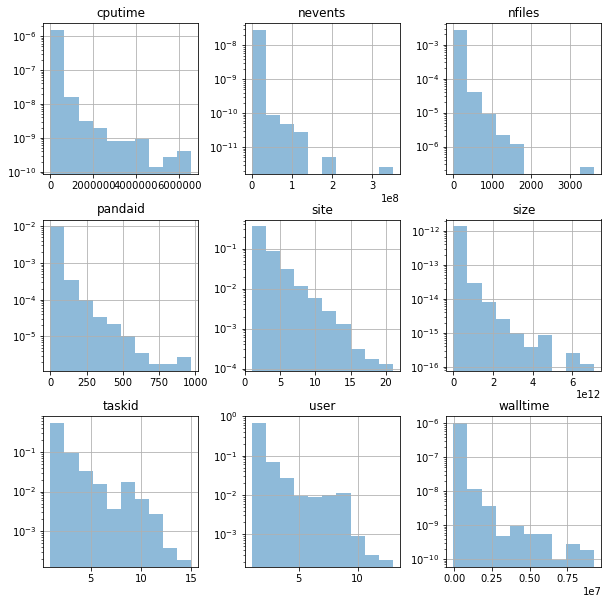

In [16]:
#make some plots
plt.figure();
df_1w.pandaid.plot.hist(bins=15, normed = True)
plt.yscale('log')

plt.figure()
df_1w[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

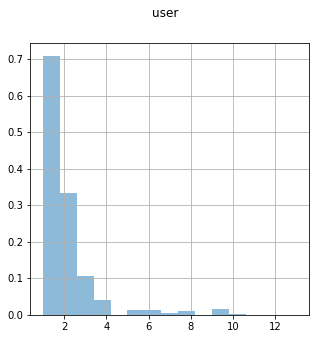

In [17]:
plt.figure()
df_1w['user'].hist(alpha=0.5, bins=15, figsize=(5, 5), normed = 1)
plt.suptitle('user')

## Example: open another week of data and merge with first one

In [88]:
#merge dataframes used for popularity measurement (used for inputs) -> gets the integral of distributions

def mergeDF(df, df_new):
    #print('Before')
    #display(df.shape)
    concatenated = pd.concat([df, df_new]) 
    #print('After')
    
    #drop date, sum over pandaids, sites, users, ...
    result = concatenated.groupby(['name','scope','dsid','ptag','type']).agg({"pandaid": np.sum, "user": np.sum,  "site": np.sum,
        "taskid": pd.Series.sum, "cputime": pd.Series.sum, "walltime": pd.Series.sum, "nevents": pd.Series.sum, 
        "nfiles": pd.Series.sum, "size": pd.Series.sum   # sum over unique pandaids, taskids, sites, users. Get the total/day for all the rest  
    }).reset_index()
  
    #display(df_new.shape)
    #display(result.shape)
    
    return result

In [236]:
filename = '../Federica/DataPopularity_ML/simpleModel_start_2016-01-08_meas_7_pred_7'

df_2w = pd.read_hdf(filename+'.h5', 'X')
display(df_2w.shape)

df_merged = mergeDF(df_1w, df_2w)
display(df_merged.shape)
display(df_merged.head(5))

(16976, 14)

(21238, 14)

,name,scope,dsid,ptag,type,taskid,cputime,size,walltime,user,pandaid,nfiles,site,nevents
0,data12_8TeV.00202712.physics_Bphysics.merge.DA...,data12_8TeV,202712,1425,DAOD_JPSIMUMU,1,7208,43389319013,13684,1,11,13,1,209256
1,data12_8TeV.00202740.physics_Bphysics.merge.DA...,data12_8TeV,202740,1425,DAOD_JPSIMUMU,1,1854,10751529386,2536,1,1,3,1,47044
2,data12_8TeV.00202798.physics_Bphysics.merge.DA...,data12_8TeV,202798,1425,DAOD_JPSIMUMU,1,10124,74054089517,14041,1,2,21,1,362970
3,data12_8TeV.00202965.physics_Bphysics.merge.DA...,data12_8TeV,202965,1425,DAOD_JPSIMUMU,1,3665,35363904915,5235,1,1,11,1,172378
4,data12_8TeV.00202987.physics_Bphysics.merge.DA...,data12_8TeV,202987,1425,DAOD_JPSIMUMU,1,2503,19718220347,3510,1,1,6,1,92535


## These files contain all datasets that have been created from 1.1.2016 to 25.7.2017


## Unzip files --> do only once!

In [20]:
import os
import tarfile
import zipfile

path = 'daod_datasets_2016_2017.tar.gz'
path = 'deleted_daod_datasets_2016_2017.tar.gz'

opener, mode = tarfile.open, 'r:gz'

cwd = os.getcwd()
os.chdir('../Federica/DataPopularity_ML/')

try:
    file = opener(path, mode)
    try: file.extractall()
    finally: file.close()
finally:
    os.chdir(cwd)

## Define useful functions to manipulate dataset names

In [21]:
# get DSID from dataset name (as a int)
def getDSID(name):

    sub = name.split('.')
    #print(sub)

    dsid = sub[1]
    
    #remove 00 for data
    if (dsid.startswith('00')):
        dsid  = dsid[2:]
    #print(dsid)
    return(int(dsid))  

In [22]:
# get scope from dataset name
def getScope(name):

    sub = name.split('.')
    #print(sub)
    scope = sub[0]
    return(scope)  

In [23]:
# get ptag from dataset name (as a int)
def getPtag(name):

    sub = name.split('.')
    #print(sub)
    last = len(sub)
    tags = sub[last-1]
    #print(tags)
    ptag=0
    subtags = tags.split('_')
    #print(subtags)
    for i in subtags:
        if (i.startswith('p')): # takes always the last one
            ptag = int(i[1:])
            #print(i)
    return(ptag)      

In [24]:
# get Type from dataset name (DOAD_*)
def getType(name):

    sub = name.split('.')
    #print(sub)

    dstype = name
    for i in sub:
        if (i.startswith('DAOD_')): # takes always the last one
            dstype = i
    #print(dstype)
    return(dstype) 

## Datasets created from 1.1.2016 and not deleted (on 25/7/2017)

- point 2. of google doc
- format is scope, name, creation date and last access date (it’s 0 if never accessed). Date is in epoch second

In [25]:
df_not = pd.read_csv('../Federica/DataPopularity_ML/daod_datasets_2016_2017.csv', header = None, sep = '\t',
                     names = ['scope', 'name', 'creation', 'lastaccess'])
display(df_not.head(5))

#drop useless columns
df_not = df_not.drop('lastaccess', axis =1)

#dataset manipulation: convert date in epoch to readable datedate (remove time in hours, leave only dates)
df_not['creation'] = df_not['creation'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).date())

#scope==archive are datasets on LOCALGROUPDSIK but not on DATADISK. Does not matter, let's replace with "real" scope 
df_not['scope'] = df_not['name'].apply(getScope)

# get a few others attributes
df_not['type'] = df_not['name'].apply(getType)
df_not['dsid'] = df_not['name'].apply(getDSID)
df_not['ptag'] = df_not['name'].apply(getPtag)

display(df_not.head(5))

,scope,name,creation,lastaccess
0,archive,data15_13TeV.00266904.physics_Main.merge.DAOD_...,1492789760,0
1,archive,data15_13TeV.00266919.physics_Main.merge.DAOD_...,1492789743,0
2,archive,data15_13TeV.00267073.physics_Main.merge.DAOD_...,1492789791,0
3,archive,data15_13TeV.00267152.physics_Main.merge.DAOD_...,1492789562,0
4,archive,data15_13TeV.00267162.physics_Main.merge.DAOD_...,1492789576,0


,scope,name,creation,type,dsid,ptag
0,data15_13TeV,data15_13TeV.00266904.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,266904,2614
1,data15_13TeV,data15_13TeV.00266919.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,266919,2614
2,data15_13TeV,data15_13TeV.00267073.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,267073,2614
3,data15_13TeV,data15_13TeV.00267152.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,267152,2614
4,data15_13TeV,data15_13TeV.00267162.physics_Main.merge.DAOD_...,2017-04-21,DAOD_EXOT15,267162,2614


## Datasets created from 1.1.2016 and already deleted (on 25/7/2017)

- point 3 of googledoc
- scope, name, creation date, deletion date, last access date (in ISO format)

In [26]:
df_del = pd.read_csv('../Federica/DataPopularity_ML/deleted_daod_datasets_2016_2017.csv', header = None, sep = '\t',
                     names = ['scope', 'name', 'creation', 'deletion', 'lastaccess'])
display(df_del.head(5))

#drop useless columns
df_del = df_del.drop('lastaccess', axis =1)
df_del = df_del.drop('deletion', axis =1)

#dataset manipulation: remove time in hours, leave only dates
df_del['creation'] = df_del['creation'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").date())

#scope==archive are datasets on LOCALGROUPDSIK but not on DATADISK. Does not matter, let's replace with "real" scope 
df_del['scope'] = df_del['name'].apply(getScope)

# get a few others attributes
df_del['type'] = df_del['name'].apply(getType)
df_del['dsid'] = df_del['name'].apply(getDSID)
df_del['ptag'] = df_del['name'].apply(getPtag)

display(df_del.head(5))

,scope,name,creation,deletion,lastaccess
0,mc12_14TeV,mc12_14TeV.167792.Sherpa_CT10_WmunuMassiveCBPt...,2016-06-02T16:02:59Z,2016-06-07T08:12:26Z,NaN
1,mc12_14TeV,mc12_14TeV.167790.Sherpa_CT10_WenuMassiveCBPt5...,2016-06-02T15:58:59Z,2016-06-07T08:12:54Z,NaN
2,mc12_14TeV,mc12_14TeV.161963.Sherpa_CT10_llnunu_ZZ.merge....,2016-05-15T22:37:50Z,2016-05-23T13:48:02Z,NaN
3,mc12_14TeV,mc12_14TeV.167771.Sherpa_CT10_WenuMassiveCBPt1...,2016-06-02T15:45:18Z,2016-06-06T08:31:23Z,NaN
4,mc12_14TeV,mc12_14TeV.167779.Sherpa_CT10_WenuMassiveCBPt2...,2016-06-02T15:51:35Z,2016-06-06T08:31:23Z,NaN


,scope,name,creation,type,dsid,ptag
0,mc12_14TeV,mc12_14TeV.167792.Sherpa_CT10_WmunuMassiveCBPt...,2016-06-02,DAOD_TRUTH1,167792,2613
1,mc12_14TeV,mc12_14TeV.167790.Sherpa_CT10_WenuMassiveCBPt5...,2016-06-02,DAOD_TRUTH1,167790,2613
2,mc12_14TeV,mc12_14TeV.161963.Sherpa_CT10_llnunu_ZZ.merge....,2016-05-15,DAOD_TRUTH1,161963,2613
3,mc12_14TeV,mc12_14TeV.167771.Sherpa_CT10_WenuMassiveCBPt1...,2016-06-02,DAOD_TRUTH1,167771,2613
4,mc12_14TeV,mc12_14TeV.167779.Sherpa_CT10_WenuMassiveCBPt2...,2016-06-02,DAOD_TRUTH1,167779,2613


In [27]:
# now merge them
display(df_del.shape)
display(df_not.shape)

concatenated = pd.concat([df_del, df_not])
display(concatenated.shape)
df_all = concatenated.drop_duplicates()
display(df_all.shape)

# There can still be duplicates based on name only in case one dataset was archived. 
# In this case the dataset name is the same, but creation date is different

(229038, 6)

(271123, 6)

(500161, 6)

(499938, 6)

## now df_all contains all datasets created from 1/1/2016 to 25/7/2017

- format is scope, name, creation date, type, dsid, ptag

In [11]:
df_2w = pd.read_hdf(filename+'.h5', 'X')

In [12]:
df_3w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-01-15_meas_7_pred_7.h5', 'X')

display(df_3w.shape)

(17087, 14)

In [4]:
df_4w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-01-22_meas_7_pred_7.h5', 'X')

display(df_4w.shape)

(16780, 14)

In [14]:
df_5w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-01-29_meas_7_pred_7.h5', 'X')

display(df_5w.shape)

(21948, 14)

In [15]:
df_6w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-05_meas_7_pred_7.h5', 'X')

display(df_6w.shape)

(18685, 14)

In [16]:
df_7w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-12_meas_7_pred_7.h5', 'X')

display(df_7w.shape)

(17035, 14)

In [17]:
df_8w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-19_meas_7_pred_7.h5', 'X')

In [18]:
df_9w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-02-26_meas_7_pred_7.h5', 'X')

In [19]:
df_10w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-04_meas_7_pred_7.h5', 'X')

In [20]:
df_11w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-11_meas_7_pred_7.h5', 'X')

In [21]:
df_12w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-18_meas_7_pred_7.h5', 'X')

In [22]:
df_13w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-03-25_meas_7_pred_7.h5', 'X')

In [23]:
df_14w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-01_meas_7_pred_7.h5', 'X')

In [24]:
df_15w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-08_meas_7_pred_7.h5', 'X')

In [25]:
df_16w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-15_meas_7_pred_7.h5', 'X')

In [26]:
df_17w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-22_meas_7_pred_7.h5', 'X')

In [27]:
df_18w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-04-29_meas_7_pred_7.h5', 'X')

In [28]:
df_19w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-06_meas_7_pred_7.h5', 'X')

In [29]:
df_20w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-13_meas_7_pred_7.h5', 'X')

In [30]:
df_21w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-20_meas_7_pred_7.h5', 'X')

In [31]:
df_22w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-05-27_meas_7_pred_7.h5', 'X')

In [32]:
df_23w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-03_meas_7_pred_7.h5', 'X')

In [33]:
df_24w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-10_meas_7_pred_7.h5', 'X')

In [34]:
df_25w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-17_meas_7_pred_7.h5', 'X')

In [80]:
df_26w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-06-24_meas_7_pred_7.h5', 'X')

In [41]:
df_27w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-01_meas_7_pred_7.h5', 'X')

In [37]:
df_28w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-08_meas_7_pred_7.h5', 'X')

In [38]:
df_29w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-15_meas_7_pred_7.h5', 'X')

In [39]:
df_30w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-22_meas_7_pred_7.h5', 'X')

In [40]:
df_31w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-07-29_meas_7_pred_7.h5', 'X')

In [41]:
df_32w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-05_meas_7_pred_7.h5', 'X')

In [42]:
df_33w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-12_meas_7_pred_7.h5', 'X')

In [43]:
df_34w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-19_meas_7_pred_7.h5', 'X')

In [44]:
df_35w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-08-26_meas_7_pred_7.h5', 'X')

In [45]:
df_36w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-02_meas_7_pred_7.h5', 'X')

In [46]:
df_37w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-09_meas_7_pred_7.h5', 'X')

In [47]:
df_38w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-16_meas_7_pred_7.h5', 'X')

In [48]:
df_39w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-23_meas_7_pred_7.h5', 'X')

In [49]:
df_40w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-09-30_meas_7_pred_7.h5', 'X')

In [50]:
df_41w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-07_meas_7_pred_7.h5', 'X')

In [51]:
df_42w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-14_meas_7_pred_7.h5', 'X')

In [52]:
df_43w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-21_meas_7_pred_7.h5', 'X')

In [53]:
df_44w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-10-28_meas_7_pred_7.h5', 'X')

In [54]:
df_45w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-04_meas_7_pred_7.h5', 'X')

In [55]:
df_46w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-11_meas_7_pred_7.h5', 'X')

In [56]:
df_47w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-18_meas_7_pred_7.h5', 'X')

In [57]:
df_48w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-11-25_meas_7_pred_7.h5', 'X')

In [58]:
df_49w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-02_meas_7_pred_7.h5', 'X')

In [59]:
df_50w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-09_meas_7_pred_7.h5', 'X')

In [60]:
df_51w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-16_meas_7_pred_7.h5', 'X')

In [61]:
df_52w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-23_meas_7_pred_7.h5', 'X')

In [62]:
df_53w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2016-12-30_meas_7_pred_7.h5', 'X')

In [63]:
df_54w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-06_meas_7_pred_7.h5', 'X')

In [64]:
df_55w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-13_meas_7_pred_7.h5', 'X')

In [65]:
df_56w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-20_meas_7_pred_7.h5', 'X')

In [66]:
df_57w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-01-27_meas_7_pred_7.h5', 'X')

In [67]:
df_58w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-03_meas_7_pred_7.h5', 'X')

In [68]:
df_59w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-10_meas_7_pred_7.h5', 'X')

In [69]:
df_60w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-17_meas_7_pred_7.h5', 'X')

In [70]:
df_61w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-02-24_meas_7_pred_7.h5', 'X')

In [71]:
df_62w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-03_meas_7_pred_7.h5', 'X')

In [72]:
df_63w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-10_meas_7_pred_7.h5', 'X')

In [73]:
df_64w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-17_meas_7_pred_7.h5', 'X')

In [74]:
df_65w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-24_meas_7_pred_7.h5', 'X')

In [75]:
df_66w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-03-31_meas_7_pred_7.h5', 'X')

In [76]:
df_67w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-07_meas_7_pred_7.h5', 'X')

In [77]:
df_68w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-14_meas_7_pred_7.h5', 'X')

In [78]:
df_69w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-21_meas_7_pred_7.h5', 'X')

In [104]:
df_1w_to_2w = mergeDF(df_1w, df_2w)

NameError: name 'df_2w' is not defined

In [94]:
display(df_1w_to_2w.shape)

(21238, 14)

In [262]:
df_3w_to_4w = mergeDF(df_3w, df_4w)

In [263]:
df_5w_to_6w = mergeDF(df_5w, df_6w)

In [264]:
df_7w_to_8w = mergeDF(df_7w, df_8w)

In [265]:
df_9w_to_10w = mergeDF(df_9w, df_10w)

In [266]:
df_11w_to_12w = mergeDF(df_11w, df_12w)

In [267]:
df_13w_to_14w = mergeDF(df_13w, df_14w)

In [268]:
df_15w_to_16w = mergeDF(df_15w, df_16w)

In [269]:
df_17w_to_18w = mergeDF(df_17w, df_18w)

In [270]:
df_19w_to_20w = mergeDF(df_19w, df_20w)

In [271]:
df_21w_to_22w = mergeDF(df_21w, df_22w)

In [272]:
df_23w_to_24w = mergeDF(df_23w, df_24w)

In [273]:
df_25w_to_26w = mergeDF(df_25w, df_26w)

In [294]:
df_27w_to_28w = mergeDF(df_27w, df_28w)

In [295]:
df_29w_to_30w = mergeDF(df_29w, df_30w)

In [296]:
df_31w_to_32w = mergeDF(df_31w, df_32w)

In [309]:
df_33w_to_34w = mergeDF(df_33w, df_34w)

In [310]:
df_35w_to_36w = mergeDF(df_35w, df_36w)

In [311]:
df_37w_to_38w = mergeDF(df_37w, df_38w)

In [312]:
df_39w_to_40w = mergeDF(df_39w, df_40w)

In [114]:
df_41w_to_42w = mergeDF(df_41w, df_42w)

In [115]:
df_43w_to_44w = mergeDF(df_43w, df_44w)

In [116]:
df_45w_to_46w = mergeDF(df_45w, df_46w)

In [117]:
df_47w_to_48w = mergeDF(df_47w, df_48w)

In [118]:
df_49w_to_50w = mergeDF(df_49w, df_50w)

In [119]:
df_51w_to_52w = mergeDF(df_51w, df_52w)

In [120]:
df_53w_to_54w = mergeDF(df_53w, df_54w)

In [121]:
df_55w_to_56w = mergeDF(df_55w, df_56w)

In [122]:
df_57w_to_58w = mergeDF(df_57w, df_58w)

In [123]:
df_59w_to_60w = mergeDF(df_59w, df_60w)

In [124]:
df_61w_to_62w = mergeDF(df_61w, df_62w)

In [125]:
df_63w_to_64w = mergeDF(df_63w, df_64w)

In [126]:
df_65w_to_66w = mergeDF(df_65w, df_66w)

In [127]:
df_67w_to_68w = mergeDF(df_67w, df_68w)

In [103]:
df_1m = mergeDF(df_1w_to_2w, df_3w_to_4w)
#I have called 4 weeks as a month

NameError: name 'df_1w_to_2w' is not defined

In [275]:
df_2m = mergeDF(df_5w_to_6w, df_7w_to_8w)

In [276]:
df_3m = mergeDF(df_9w_to_10w, df_11w_to_12w)

In [277]:
df_4m = mergeDF(df_13w_to_14w, df_15w_to_16w)

In [278]:
df_5m = mergeDF(df_17w_to_18w, df_19w_to_20w)

In [279]:
df_6m = mergeDF(df_21w_to_22w, df_23w_to_24w)

In [297]:
df_7m = mergeDF(df_25w_to_26w, df_27w_to_28w)

In [298]:
df_8m = mergeDF(df_29w_to_30w, df_31w_to_32w)

In [313]:
df_9m = mergeDF(df_33w_to_34w, df_35w_to_36w)

In [314]:
df_10m = mergeDF(df_37w_to_38w, df_39w_to_40w)

In [143]:
df_11m = mergeDF(df_41w_to_42w, df_43w_to_44w)

In [144]:
df_12m = mergeDF(df_45w_to_46w, df_47w_to_48w)

In [145]:
df_13m = mergeDF(df_49w_to_50w, df_51w_to_52w)

In [146]:
df_14m = mergeDF(df_53w_to_54w, df_55w_to_56w)

In [147]:
df_15m = mergeDF(df_57w_to_58w, df_59w_to_60w)

In [148]:
df_16m = mergeDF(df_61w_to_62w, df_63w_to_64w)

In [149]:
df_17m = mergeDF(df_65w_to_66w, df_67w_to_68w)

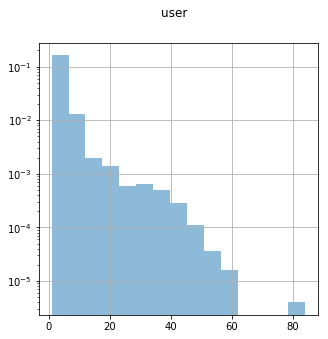

In [153]:
plt.figure()
df_17m['user'].hist(alpha=0.5, bins=15, figsize=(5, 5), normed = 1, log = True)
plt.suptitle('user')

In [154]:
df_1m_to_2m = mergeDF(df_1m, df_2m)

In [155]:
df_3m_to_4m = mergeDF(df_3m, df_4m)

In [156]:
df_5m_to_6m = mergeDF(df_5m, df_6m)

In [158]:
df_8m_to_9m = mergeDF(df_8m, df_9m)

In [159]:
df_10m_to_11m = mergeDF(df_10m, df_11m)

In [160]:
df_12m_to_13m = mergeDF(df_12m, df_13m)

In [161]:
df_14m_to_15m = mergeDF(df_14m, df_15m)

In [162]:
df_16m_to_17m = mergeDF(df_16m, df_17m)

In [163]:
df_1m_to_4m = mergeDF(df_1m_to_2m, df_3m_to_4m)

In [164]:
display(df_1m_to_4m.shape)

(69574, 14)

In [311]:
df_5m_to_26w = mergeDF(df_5m_to_6m, df_25w_to_26w)

In [312]:
df_27w_to_9m = mergeDF(df_27w_to_28w, df_8m_to_9m)

In [167]:
df_10m_to_13m = mergeDF(df_10m_to_11m, df_12m_to_13m)

In [168]:
df_14m_to_17m = mergeDF(df_14m_to_15m, df_16m_to_17m)

In [313]:
df_1sem2016 = mergeDF(df_1m_to_4m, df_5m_to_26w)

In [314]:
df_2sem2016 = mergeDF(df_27w_to_9m, df_10m_to_13m)

In [171]:
df_1sem2017 = mergeDF(df_14m_to_17m, df_69w)

In [315]:
display(df_1sem2016.shape)

(122427, 14)

In [316]:
display(df_2sem2016.shape)

(104926, 14)

In [174]:
display(df_1sem2017.shape)

(98141, 14)

In [317]:
display(df_all.shape)

(499938, 6)

In [32]:
df_all['creation'] = pd.to_datetime(df_all.creation)

/home/ivukotic/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
df_all.sort_values(by='creation')

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501
16353,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-02,DAOD_TOPQ1,410015,2501
11910,mc15_13TeV,mc15_13TeV.410006.PowhegPythia8EvtGen_A14_ttba...,2016-01-04,DAOD_HIGG3D1,410006,2495
11909,mc15_13TeV,mc15_13TeV.361486.Sherpa_CT10_Ztautau_Mll10to4...,2016-01-04,DAOD_HIGG3D1,361486,2495
106507,mc15_13TeV,mc15_13TeV.361094.Sherpa_CT10_WqqZll_SHv21_imp...,2016-01-04,DAOD_HIGG5D1,361094,2459
11907,mc15_13TeV,mc15_13TeV.361513.MadGraphPythia8EvtGen_A14NNP...,2016-01-04,DAOD_HIGG3D1,361513,2495


In [34]:
df_all_ordered = df_all.sort_values(by='creation')

In [35]:
display(df_all_ordered.shape)

(499938, 6)

In [231]:
display(df_all_ordered.head(5))

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501


In [320]:
df_year2016 = mergeDF(df_1sem2016, df_2sem2016)

In [321]:
df_year2016.shape

(188997, 14)

In [322]:
df_total = mergeDF(df_year2016, df_1sem2017)

In [323]:
df_total.shape

(241288, 14)

In [324]:
store = pd.HDFStore('store_access>0.h5')

In [325]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
Empty

In [326]:
store['df_1sem2016'] = df_1sem2016

In [327]:
store['df_2sem2016'] = df_2sem2016

In [328]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_2sem2016            frame        (shape->[104926,14])

In [329]:
store['df_1sem2017'] = df_1sem2017

In [330]:
store['df_year2016'] = df_year2016

In [331]:
store['df_total'] = df_total

In [332]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_1sem2017            frame        (shape->[98141,14]) 
/df_2sem2016            frame        (shape->[104926,14])
/df_total               frame        (shape->[241288,14])
/df_year2016            frame        (shape->[188997,14])

In [333]:
store.close()

In [334]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
File is CLOSED

In [335]:
store.open()

In [336]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_1sem2017            frame        (shape->[98141,14]) 
/df_2sem2016            frame        (shape->[104926,14])
/df_total               frame        (shape->[241288,14])
/df_year2016            frame        (shape->[188997,14])

In [337]:
store.close()

In [338]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
File is CLOSED

In [339]:
df_conferma= pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2016')

In [340]:
df_conferma.shape

(122427, 14)

In [341]:
df_conferma2= pd.read_hdf('../Matteo/store_access>0.h5', key='df_total')

In [342]:
df_conferma2.shape

(241288, 14)

In [343]:
df_all_ordered

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501
16353,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-02,DAOD_TOPQ1,410015,2501
11910,mc15_13TeV,mc15_13TeV.410006.PowhegPythia8EvtGen_A14_ttba...,2016-01-04,DAOD_HIGG3D1,410006,2495
11909,mc15_13TeV,mc15_13TeV.361486.Sherpa_CT10_Ztautau_Mll10to4...,2016-01-04,DAOD_HIGG3D1,361486,2495
106507,mc15_13TeV,mc15_13TeV.361094.Sherpa_CT10_WqqZll_SHv21_imp...,2016-01-04,DAOD_HIGG5D1,361094,2459
11907,mc15_13TeV,mc15_13TeV.361513.MadGraphPythia8EvtGen_A14NNP...,2016-01-04,DAOD_HIGG3D1,361513,2495


In [344]:
df_all_ordered[(df_all_ordered['creation'] >= '2016-01-01') & (df_all_ordered['creation'] <= '2016-01-07')]

,scope,name,creation,type,dsid,ptag
25108,mc15_13TeV,mc15_13TeV.410145.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-01,DAOD_TOPQ1,410145,2501
402,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
11826,mc15_13TeV,mc15_13TeV.410016.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410016,2501
400,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-01,DAOD_TOPQ1,410015,2501
11912,mc15_13TeV,mc15_13TeV.410146.PowhegHerwigppEvtGen_UEEE5_W...,2016-01-02,DAOD_TOPQ1,410146,2501
16353,mc15_13TeV,mc15_13TeV.410015.PowhegPythiaEvtGen_P2012_Wt_...,2016-01-02,DAOD_TOPQ1,410015,2501
11910,mc15_13TeV,mc15_13TeV.410006.PowhegPythia8EvtGen_A14_ttba...,2016-01-04,DAOD_HIGG3D1,410006,2495
11909,mc15_13TeV,mc15_13TeV.361486.Sherpa_CT10_Ztautau_Mll10to4...,2016-01-04,DAOD_HIGG3D1,361486,2495
106507,mc15_13TeV,mc15_13TeV.361094.Sherpa_CT10_WqqZll_SHv21_imp...,2016-01-04,DAOD_HIGG5D1,361094,2459
11907,mc15_13TeV,mc15_13TeV.361513.MadGraphPythia8EvtGen_A14NNP...,2016-01-04,DAOD_HIGG3D1,361513,2495


In [345]:
df_all_1w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-01') & (df_all_ordered['creation'] <= '2016-01-07')]

In [346]:
df_all_1w.shape

(3081, 6)

In [347]:
df_all_2w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-08') & (df_all_ordered['creation'] <= '2016-01-14')]

In [348]:
df_all_2w.shape

(2714, 6)

In [349]:
df_all_3w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-15') & (df_all_ordered['creation'] <= '2016-01-21')]

In [350]:
df_all_3w.shape

(5427, 6)

In [351]:
df_all_4w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-22') & (df_all_ordered['creation'] <= '2016-01-28')]

In [352]:
df_all_5w = df_all_ordered[(df_all_ordered['creation'] >= '2016-01-29') & (df_all_ordered['creation'] <= '2016-02-04')]

In [353]:
df_all_2w.shape

(2714, 6)

In [354]:
df_all_5w.shape

(5102, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe925d97198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe9255154a8>]], dtype=object)

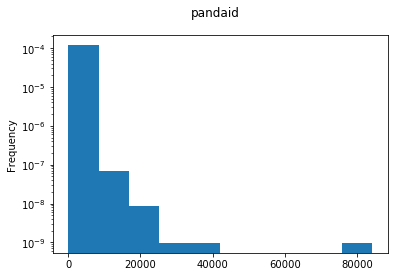

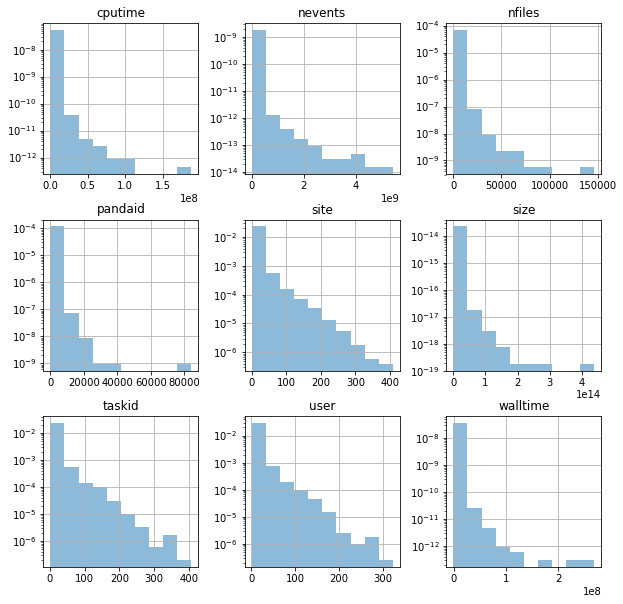

In [355]:
plt.figure();
df_1sem2016.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_1sem2016[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe936fda198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe92d0aa1d0>]], dtype=object)

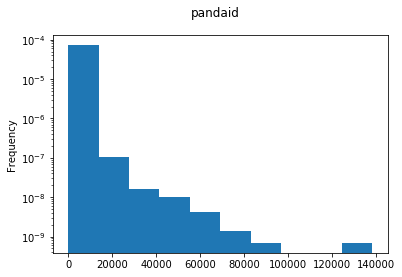

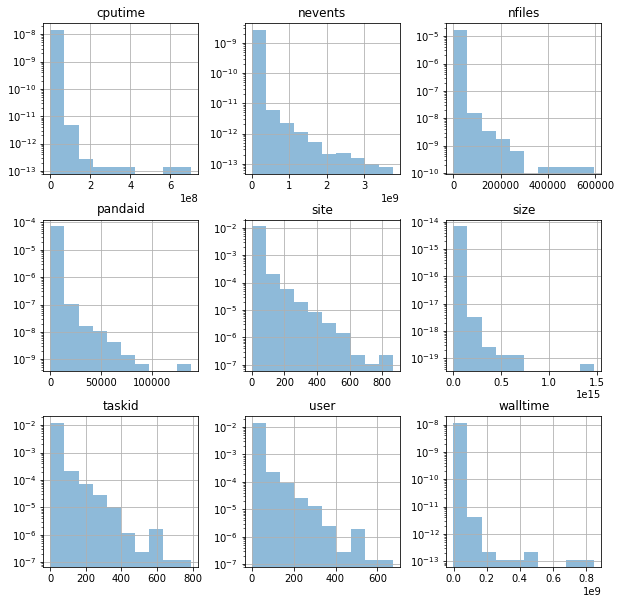

In [356]:
plt.figure();
df_2sem2016.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_2sem2016[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

In [10]:
plt.figure();
df_1sem2017.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_1sem2017[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

NameError: name 'df_1sem2017' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe928a70908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe92cae4b38>]], dtype=object)

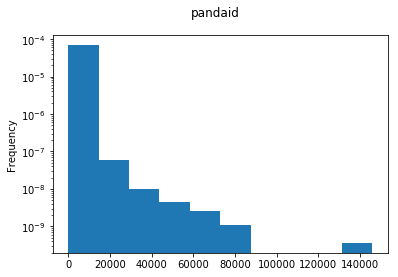

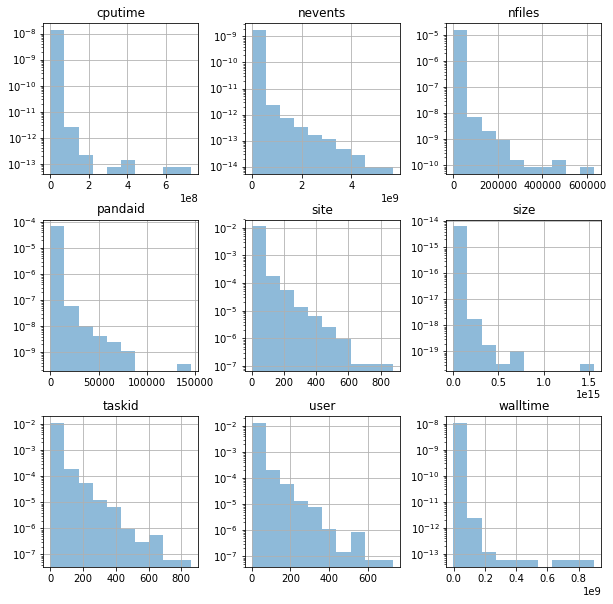

In [358]:
plt.figure();
df_year2016.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_year2016[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe92808dba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe928cb6860>]], dtype=object)

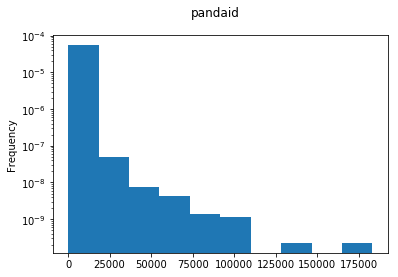

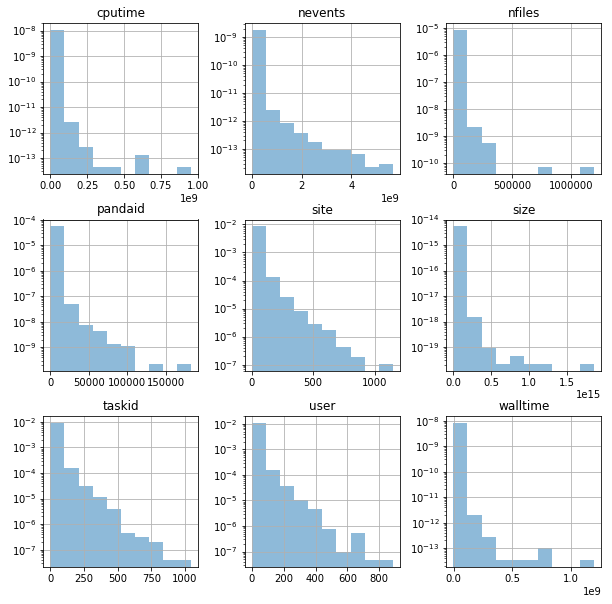

In [359]:
plt.figure();
df_total.pandaid.plot.hist(bins=10, normed = True)
plt.yscale('log')
plt.suptitle('pandaid')

plt.figure()
df_total[['user', 'taskid', 'cputime', 'pandaid', 'size', 
    'nfiles', 'site', 'walltime', 'nevents']].hist(alpha=0.5, bins=10, figsize=(10, 10), log = True, normed = True)

In [361]:
df_1m_to_3m = mergeDF(df_1m_to_2m, df_3m)

In [362]:
df_1trim2016 = mergeDF(df_1m_to_3m, df_13w)

In [363]:
df_14w_to_16w = mergeDF(df_14w, df_15w_to_16w)

In [364]:
df_2trim2016 = mergeDF(df_14w_to_16w, df_5m_to_26w)

In [365]:
df_37w_to_39w = mergeDF(df_37w_to_38w, df_39w)

In [366]:
df_3trim2016 = mergeDF(df_27w_to_9m, df_37w_to_39w)

In [367]:
df_40w_to_44w = mergeDF(df_40w, df_11m)

In [368]:
df_4trim2016 = mergeDF(df_40w_to_44w, df_12m_to_13m)

In [373]:
df_16m_to_65w = mergeDF(df_16m, df_65w)

In [374]:
df_1trim2017 = mergeDF(df_14m_to_15m, df_16m_to_65w)

In [378]:
store.open()

In [379]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016            frame        (shape->[122427,14])
/df_1sem2017            frame        (shape->[98141,14]) 
/df_2sem2016            frame        (shape->[104926,14])
/df_total               frame        (shape->[241288,14])
/df_year2016            frame        (shape->[188997,14])

In [380]:
store['df_1trim2016'] = df_1trim2016

In [381]:
store['df_2trim2016'] = df_2trim2016

In [382]:
store['df_3trim2016'] = df_3trim2016

In [383]:
store['df_4trim2016'] = df_4trim2016

In [384]:
store['df_1trim2017'] = df_1trim2017

In [385]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1sem2017             frame        (shape->[98141,14]) 
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_total                frame        (shape->[241288,14])
/df_year2016             frame        (shape->[188997,14])

In [386]:
store.close()

In [387]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
File is CLOSED

In [393]:
store.open()

In [394]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1sem2017             frame        (shape->[98141,14]) 
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_total                frame        (shape->[241288,14])
/df_year2016             frame        (shape->[188997,14])

In [396]:
del store['df_1sem2017']

In [397]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_total                frame        (shape->[241288,14])
/df_year2016             frame        (shape->[188997,14])

In [398]:
del store['df_total']

In [399]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_year2016             frame        (shape->[188997,14])

In [79]:
df_70w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-04-28_meas_7_pred_7.h5', 'X')

In [80]:
df_71w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-05_meas_7_pred_7.h5', 'X')

In [81]:
df_72w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-12_meas_7_pred_7.h5', 'X')

In [82]:
df_73w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-19_meas_7_pred_7.h5', 'X')

In [83]:
df_74w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-05-26_meas_7_pred_7.h5', 'X')

In [84]:
df_75w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-02_meas_7_pred_7.h5', 'X')

In [85]:
df_76w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-09_meas_7_pred_7.h5', 'X')

In [86]:
df_77w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-16_meas_7_pred_7.h5', 'X')

In [87]:
df_78w= pd.read_hdf('../Federica/DataPopularity_ML/simpleModel_start_2017-06-23_meas_7_pred_7.h5', 'X')

In [410]:
df_69w_to_70w = mergeDF(df_69w, df_70w)

In [411]:
df_71w_to_72w = mergeDF(df_71w, df_72w)

In [412]:
df_73w_to_74w = mergeDF(df_73w, df_74w)

In [413]:
df_75w_to_76w = mergeDF(df_75w, df_76w)

In [414]:
df_77w_to_78w = mergeDF(df_77w, df_78w)

In [415]:
df_18m = mergeDF(df_69w_to_70w, df_71w_to_72w)

In [416]:
df_19m = mergeDF(df_73w_to_74w, df_75w_to_76w)

In [417]:
df_18m_to_19m = mergeDF(df_18m, df_19m)

In [418]:
df_18m_to_78w = mergeDF(df_18m_to_19m, df_77w_to_78w)

In [419]:
df_1sem2017 = mergeDF(df_14m_to_17m, df_18m_to_78w)

In [420]:
df_1sem2017.shape

(114745, 14)

In [421]:
store['df_1sem2017'] = df_1sem2017

In [422]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_access>0.h5
/df_1sem2016             frame        (shape->[122427,14])
/df_1sem2017             frame        (shape->[114745,14])
/df_1trim2016            frame        (shape->[64675,14]) 
/df_1trim2017            frame        (shape->[90685,14]) 
/df_2sem2016             frame        (shape->[104926,14])
/df_2trim2016            frame        (shape->[93621,14]) 
/df_3trim2016            frame        (shape->[64054,14]) 
/df_4trim2016            frame        (shape->[78750,14]) 
/df_year2016             frame        (shape->[188997,14])

In [423]:
df_total = mergeDF(df_year2016, df_1sem2017)

In [424]:
df_66w_to_68w = mergeDF(df_66w, df_67w_to_68w)

In [425]:
df_total.shape

(256123, 14)

In [426]:
store['df_total'] = df_total

In [436]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
Empty

In [428]:
df_2trim2017 = mergeDF(df_66w_to_68w, df_18m_to_78w)

In [442]:
store['df_2trim2017'] = df_2trim2017

In [7]:
df_conferma= pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2016')

In [8]:
display(df_conferma)

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64


In [30]:
store = pd.HDFStore('store_withBackground.h5')

In [36]:
store['df_all_ordered'] = df_all_ordered

In [37]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [38]:
df_all_ordered.shape

(499938, 6)

In [39]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [40]:
del store['df_all_ordered']

In [41]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
Empty

In [42]:
store['df_all_ordered'] = df_all_ordered

In [43]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [44]:
df_speriamo = pd.read_hdf('../Matteo/store_access>0.h5', key='df_year2016')

In [45]:
display(df_speriamo)

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,38875,235229777244,9,9,68472,9,58,1992663,63
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1673,6685393977,9,9,4157,9,9,51651,9
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,106670,415535155690,11,11,202671,11,95,3689580,110
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,63163,379411560819,10,10,105518,10,91,2924973,99
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,26994,155202280875,9,9,42970,10,37,1142109,45
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,43468,200654266842,10,10,91908,10,45,1516392,54
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,16847,87977050362,9,9,37322,9,23,646596,27
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,160846,579126362020,10,10,314439,11,143,4383570,170
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,14406,79656840585,9,9,22510,9,23,603432,27
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,45357,266286460473,9,9,94847,9,60,2034612,72


In [46]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])

In [84]:
df_1sem2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2016')

In [840]:
df_1sem2016.shape

(122427, 14)

In [841]:
df_1sem2016

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64


In [842]:
df_2sem2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_2sem2016')

In [843]:
df_1sem2017 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1sem2017')

In [844]:
df_year2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_year2016')

In [845]:
df_total = pd.read_hdf('../Matteo/store_access>0.h5', key='df_total')

In [846]:
df_1trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1trim2016')

In [847]:
df_2trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_2trim2016')

In [848]:
df_3trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_3trim2016')

In [849]:
df_4trim2016 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_4trim2016')

In [850]:
df_1trim2017 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_1trim2017')

In [851]:
df_2trim2017 = pd.read_hdf('../Matteo/store_access>0.h5', key='df_2trim2017')

In [852]:
df_total.shape

(256123, 14)

In [63]:
df_1sem2016.user

0          8
1          8
2         10
3          9
4          8
5          9
6          8
7          9
8          8
9          8
10         7
11         8
12         8
13         8
14         9
15         9
16        10
17        10
18         9
19        11
20        10
21        10
22        12
23         9
24        10
25        12
26         9
27        11
28         8
29         9
          ..
122397     1
122398     4
122399     2
122400     1
122401     4
122402     2
122403     2
122404     1
122405     1
122406     1
122407     1
122408     4
122409     4
122410     4
122411     4
122412     4
122413     4
122414     5
122415     5
122416     5
122417     6
122418     3
122419     2
122420     3
122421     2
122422     3
122423     3
122424     3
122425     2
122426     2
Name: user, Length: 122427, dtype: int64

In [75]:
column_1sem2016 = pd.DataFrame({'period': '1sem2016'}, index=list(range(122427)))

In [853]:
df_1sem2016['period'] = pd.Series('1sem2016', index=df_1sem2016.index)

In [854]:
df_1sem2016

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles,period
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56,1sem2016
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8,1sem2016
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99,1sem2016
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88,1sem2016
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40,1sem2016
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48,1sem2016
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24,1sem2016
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153,1sem2016
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24,1sem2016
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64,1sem2016


In [855]:
df_2sem2016['period'] = pd.Series('2sem2016', index=df_2sem2016.index)

In [856]:
df_1sem2017['period'] = pd.Series('1sem2017', index=df_1sem2017.index)

In [857]:
df_sem = pd.concat([df_1sem2016, df_2sem2016, df_1sem2017], ignore_index=True)

In [858]:
df_sem

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles,period
0,data11_7TeV.00178044.physics_Muons.merge.DAOD_...,data11_7TeV,178044,811,DAOD_ONIAMUMU,32586,209093135328,8,8,60435,8,51,1771256,56,1sem2016
1,data11_7TeV.00178047.physics_Muons.merge.DAOD_...,data11_7TeV,178047,811,DAOD_ONIAMUMU,1401,5942572424,8,8,3720,8,8,45912,8,1sem2016
2,data11_7TeV.00178109.physics_Muons.merge.DAOD_...,data11_7TeV,178109,811,DAOD_ONIAMUMU,91322,373981640121,10,10,182843,10,84,3320622,99,1sem2016
3,data11_7TeV.00179710.physics_Muons.merge.DAOD_...,data11_7TeV,179710,811,DAOD_ONIAMUMU,52033,337254720728,9,9,88649,9,80,2599976,88,1sem2016
4,data11_7TeV.00179725.physics_Muons.merge.DAOD_...,data11_7TeV,179725,811,DAOD_ONIAMUMU,21981,137957583000,8,8,35439,9,32,1015208,40,1sem2016
5,data11_7TeV.00179739.physics_Muons.merge.DAOD_...,data11_7TeV,179739,811,DAOD_ONIAMUMU,34740,178359348304,9,9,80375,9,39,1347904,48,1sem2016
6,data11_7TeV.00179771.physics_Muons.merge.DAOD_...,data11_7TeV,179771,811,DAOD_ONIAMUMU,13699,78201822544,8,8,31602,8,20,574752,24,1sem2016
7,data11_7TeV.00179804.physics_Muons.merge.DAOD_...,data11_7TeV,179804,811,DAOD_ONIAMUMU,137603,521213725818,9,9,284477,10,126,3945213,153,1sem2016
8,data11_7TeV.00179938.physics_Muons.merge.DAOD_...,data11_7TeV,179938,811,DAOD_ONIAMUMU,11512,70806080520,8,8,17183,8,20,536384,24,1sem2016
9,data11_7TeV.00179939.physics_Muons.merge.DAOD_...,data11_7TeV,179939,811,DAOD_ONIAMUMU,36737,236699075976,8,8,80245,8,52,1808544,64,1sem2016


In [879]:
def correlations(data, title = '', **kwds):
    """Calculate pairwise correlation between features.
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of correlation values if you do not need the fancy plotting
    corrmat = data.corr(**kwds)

    fig, ax1 = plt.subplots(ncols=1, figsize=(6,5))

    opts = {'cmap': plt.get_cmap("RdBu"),
            'vmin': -1, 'vmax': +1}
    heatmap1 = ax1.pcolor(corrmat, **opts)
    plt.colorbar(heatmap1, ax=ax1)

    ax1.set_title("Correlation "+title)

    labels = corrmat.columns.values
    for ax in (ax1,):
        # shift location of ticks to center of the bins
        ax.set_xticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_yticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_xticklabels(labels, minor=False, ha='right', rotation=70)
        ax.set_yticklabels(labels, minor=False)

    plt.tight_layout()
    
    
    
    
    
    #DEVI DROPPARE LE STRINGHE  (ANCHE dsid E ptag)  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [837]:
df_sem_corr = df_sem.drop([col for col in df_sem.columns if 'dsid' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'ptag' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'type' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'scope' in col], axis=1)
df_sem_corr = df_sem_corr.drop([col for col in df_sem_corr.columns if 'name' in col], axis=1)

In [866]:
store[store_access>0.h5]

SyntaxError: invalid syntax (<ipython-input-866-47bf0dbab6fc>, line 1)

In [870]:
store.keys()

['/df_all_ordered']

In [871]:
store['df_sem'] = df_sem

In [872]:
store.keys()

['/df_all_ordered', '/df_sem']

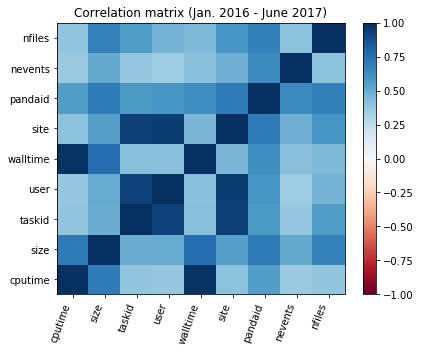

In [884]:
correlations(df_sem_corr, 'matrix (Jan. 2016 - June 2017)')

In [883]:
df_sem_corr.corr()

,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
cputime,1.000000,0.706617,0.397339,0.385950,0.990353,0.413427,0.557929,0.371515,0.392140
size,0.706617,1.000000,0.499065,0.504481,0.758609,0.550845,0.705277,0.514250,0.677370
taskid,0.397339,0.499065,1.000000,0.935983,0.427067,0.940481,0.573743,0.389282,0.554760
user,0.385950,0.504481,0.935983,1.000000,0.419328,0.951161,0.586376,0.365754,0.474704
walltime,0.990353,0.758609,0.427067,0.419328,1.000000,0.455140,0.618560,0.414104,0.440113
site,0.413427,0.550845,0.940481,0.951161,0.455140,1.000000,0.709786,0.487592,0.590612
pandaid,0.557929,0.705277,0.573743,0.586376,0.618560,0.709786,1.000000,0.633685,0.686084
nevents,0.371515,0.514250,0.389282,0.365754,0.414104,0.487592,0.633685,1.000000,0.408861
nfiles,0.392140,0.677370,0.554760,0.474704,0.440113,0.590612,0.686084,0.408861,1.000000


In [886]:
df_total= pd.read_hdf('../Matteo/store_access>0.h5', key='df_total')

In [887]:
df_total.shape

(256123, 14)

In [888]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store_withBackground.h5
/df_all_ordered            frame        (shape->[1,6])      
/df_sem                    frame        (shape->[342098,15])

In [901]:
df_1sem2016_corr = df_1sem2016.drop([col for col in df_1sem2016.columns if 'dsid' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'ptag' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'type' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'scope' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'name' in col], axis=1)
df_1sem2016_corr = df_1sem2016_corr.drop([col for col in df_1sem2016_corr.columns if 'period' in col], axis=1)

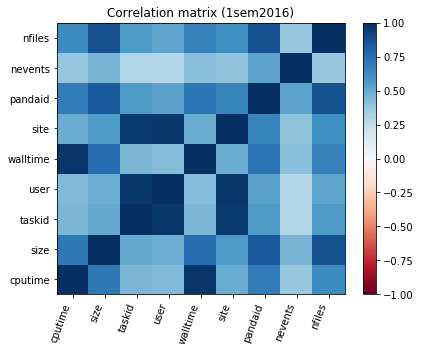

In [903]:
correlations(df_1sem2016_corr, 'matrix (1sem2016)')

In [911]:
df_1sem2016_corr.corr()

,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
cputime,1.000000,0.715266,0.459083,0.441652,0.972325,0.494202,0.700820,0.386683,0.629195
size,0.715266,1.000000,0.511564,0.490527,0.761047,0.564695,0.841335,0.468033,0.873636
taskid,0.459083,0.511564,1.000000,0.968493,0.457701,0.960074,0.567414,0.289966,0.563090
user,0.441652,0.490527,0.968493,1.000000,0.437255,0.964846,0.541424,0.295161,0.526249
walltime,0.972325,0.761047,0.457701,0.437255,1.000000,0.498313,0.732177,0.417326,0.673405
site,0.494202,0.564695,0.960074,0.964846,0.498313,1.000000,0.662109,0.403380,0.618103
pandaid,0.700820,0.841335,0.567414,0.541424,0.732177,0.662109,1.000000,0.537197,0.873387
nevents,0.386683,0.468033,0.289966,0.295161,0.417326,0.403380,0.537197,1.000000,0.387794
nfiles,0.629195,0.873636,0.563090,0.526249,0.673405,0.618103,0.873387,0.387794,1.000000


In [7]:
df_total_corr = df_total.drop([col for col in df_total.columns if 'dsid' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'ptag' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'type' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'scope' in col], axis=1)
df_total_corr = df_total_corr.drop([col for col in df_total_corr.columns if 'name' in col], axis=1)

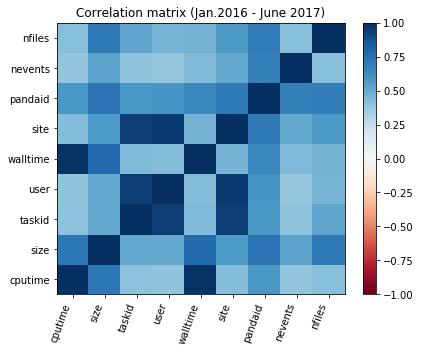

In [913]:
correlations(df_total_corr, 'matrix (Jan.2016 - June 2017)')

In [5]:
df_total = pd.read_hdf('../Matteo/store_access>0.h5', key = 'df_total')

In [8]:
df_total_corr.corr()

,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
cputime,1.000000,0.725848,0.413328,0.401720,0.989500,0.434447,0.584477,0.396983,0.425101
size,0.725848,1.000000,0.509429,0.514399,0.779751,0.568616,0.737192,0.531461,0.711963
taskid,0.413328,0.509429,1.000000,0.947902,0.441616,0.946211,0.578168,0.399751,0.527898
user,0.401720,0.514399,0.947902,1.000000,0.433344,0.956190,0.591913,0.387056,0.466158
walltime,0.989500,0.779751,0.441616,0.433344,1.000000,0.474954,0.646445,0.442044,0.475183
site,0.434447,0.568616,0.946211,0.956190,0.474954,1.000000,0.716812,0.510729,0.572137
pandaid,0.584477,0.737192,0.578168,0.591913,0.646445,0.716812,1.000000,0.676525,0.698816
nevents,0.396983,0.531461,0.399751,0.387056,0.442044,0.510729,0.676525,1.000000,0.423366
nfiles,0.425101,0.711963,0.527898,0.466158,0.475183,0.572137,0.698816,0.423366,1.000000


In [5]:
def checkPrediction(X, Y, bdt):
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import mean_squared_error
    
    y_predicted = bdt.predict(X)
    print(classification_report(Y, y_predicted, target_names=["background", "signal"]))
    print("Area under ROC curve: %.4f"%(roc_auc_score(Y, bdt.decision_function(X)))) 
    print("MSE (Mean Square Error): %.4f" % (mean_squared_error(Y, y_predicted)))
    return

In [6]:
#confusion matrix

def cmReport(CM):
  
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN) # signal corrected identified/ (true signal+signal misidentified as background==total true signal)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) # background correctly identified / (true background+background misidentified as signal==total true background)    
    # Precision or positive predictive value
    PPV = TP/(TP+FP) # signal corrected identified/ (true signal+background as signal ==total recognized signal)   
    # Negative predictive value
    NPV = TN/(TN+FN) # background corrected identified/ (true background+ signal as background ==total recognized background)
    # Fall out or false positive rate
    FPR = FP/(FP+TN) # misidentified background/total background

    # False negative rate
    FNR = FN/(TP+FN) # misidentified signal/total signal
    # False discovery rate
    FDR = FP/(TP+FP) # misidentified background/total recognized signal
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('TP ' + str(TP) + ' FP '+ str(FP) +' TN ' + str(TN) + ' FN ' + str(FN))
    print('Sensitivity, hit rate, recall, or true positive rate '+str(round(TPR, 3)))
    print('Specificity or true negative rate '+str(round(TNR, 3)))
    print('Precision or positive predictive value '+str(round(PPV, 3)))
    print('Negative predictive value '+str(round(NPV, 3)))
    print('Fall out or false positive rate '+str(round(FPR, 3)))    
    print('False negative rate '+str(round(FNR, 3)))    
    print('False discovery rate '+str(round(FDR, 3)))
    print('overall accuracy '+str(round(ACC, 3)))
    
    return

In [7]:
def plotROC(bdt, X):
    
    from sklearn.metrics import roc_curve, auc

    decisions = bdt.decision_function(X_test)
    
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, decisions)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate (Background rejection)')
    plt.ylabel('True Positive Rate (Signal efficiency)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
    return

In [8]:
#Overtraining

def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.decision_function(X[y>0.5]).ravel()
        d2 = clf.decision_function(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    
    plt.hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='S (train)')
    plt.hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='B (train)')

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale
    
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='S (test)')
    
    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='B (test)')

    plt.xlabel("BDT output")
    plt.ylabel("Arbitrary units")
    plt.legend(loc='best')


In [42]:
df_27w.shape

(21451, 14)

In [89]:
df_27 = mergeDF(df_1sem2016, df_27w)

In [98]:
common = pd.merge(df_1sem2016, df_27w, on = ['name'], how='inner')

In [106]:
df_X = df_27w

In [46]:
df_X[df_X['size'] > 370000000000].count()

name        2127
scope       2127
user        2127
taskid      2127
cputime     2127
pandaid     2127
size        2127
nfiles      2127
site        2127
walltime    2127
nevents     2127
dsid        2127
ptag        2127
type        2127
dtype: int64

In [47]:
Y = np.where(df_X['size'] > 370000000000, 1, 0)

In [48]:
Y.sum()

2127

In [49]:
df_X.head(5)

,name,scope,user,taskid,cputime,pandaid,size,nfiles,site,walltime,nevents,dsid,ptag,type
0,data12_8TeV.00202712.physics_Bphysics.merge.DA...,data12_8TeV,1,1,71633,13,43389319013,13,1,82537,209256,202712,1425,DAOD_JPSIMUMU
1,data12_8TeV.00202740.physics_Bphysics.merge.DA...,data12_8TeV,1,1,22874,3,10751529386,3,1,26161,47044,202740,1425,DAOD_JPSIMUMU
2,data12_8TeV.00202798.physics_Bphysics.merge.DA...,data12_8TeV,1,1,119603,21,74054089517,21,1,134523,362970,202798,1425,DAOD_JPSIMUMU
3,data12_8TeV.00202965.physics_Bphysics.merge.DA...,data12_8TeV,1,1,53099,11,35363904915,11,1,60042,172378,202965,1425,DAOD_JPSIMUMU
4,data12_8TeV.00202987.physics_Bphysics.merge.DA...,data12_8TeV,1,1,33046,6,19718220347,6,1,37457,92535,202987,1425,DAOD_JPSIMUMU


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_scope = cv.fit_transform(list(df_X.scope))
cv_scope_array = cv_scope.toarray()
print(cv_scope_array)
print(type(cv_scope_array))

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ..., 
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]
<class 'numpy.ndarray'>


In [51]:
cv_scope_array.shape

(21451, 4)

In [52]:
tv = CountVectorizer()
tv_type=tv.fit_transform(list(df_X.type))
tv_type_array = tv_type.toarray()
print(tv_type_array)
print(type(tv_type_array))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
<class 'numpy.ndarray'>


In [53]:
tv_type_array.shape

(21451, 73)

In [54]:
df_X =  df_X.drop([col for col in df_X.columns if 'type' in col], axis=1)
df_X =  df_X.drop([col for col in df_X.columns if 'scope' in col], axis=1)
df_X =  df_X.drop([col for col in df_X.columns if 'name' in col], axis=1)

In [55]:
df_X =  df_X.drop([col for col in df_X.columns if 'size' in col], axis=1)
df_X =  df_X.drop([col for col in df_X.columns if 'pandaid' in col], axis=1)
df_X =  df_X.drop([col for col in df_X.columns if 'nfiles' in col], axis=1)
df_X =  df_X.drop([col for col in df_X.columns if 'walltime' in col], axis=1)
df_X =  df_X.drop([col for col in df_X.columns if 'cputime' in col], axis=1)

In [76]:
df_X.head(5)

,user,taskid,site,nevents,dsid,ptag
0,1,1,1,209256,202712,1425
1,1,1,1,47044,202740,1425
2,1,1,1,362970,202798,1425
3,1,1,1,172378,202965,1425
4,1,1,1,92535,202987,1425


In [57]:
X = df_X.as_matrix().astype(np.float)

In [58]:
X.shape

(21451, 6)

In [59]:
X = np.concatenate((X, cv_scope_array), axis = 1)

In [60]:
X.shape

(21451, 10)

In [61]:
X = np.concatenate((X, tv_type_array), axis = 1)

In [62]:
X.shape

(21451, 83)

In [33]:
from sklearn.model_selection import train_test_split

#first split into development (to optimise hyperparameters) and evaluation (to train+test final model) samples
#X_dev,X_eval, y_dev,y_eval = train_test_split(X, Y, test_size=0.50, random_state=42)
#X = X_eval
#Y = y_eval

#print('Used for development (hyperparameters optimization): '+str(len(y_dev)))
#print('Used for training+testing: '+str(len(y_eval)))

X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size=0.33, random_state=451)

print('Used for training: '+str(len(y_train)))
print('Used for testing:  '+str(len(y_test)))

Used for training: 11242
Used for testing:  5538


In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_old, y_old, test_size=0.31, random_state=451)

print('Used for training: '+str(len(y_train)))
print('Used for testing:  '+str(len(y_test)))
print(X_train.shape)
print(y_train.shape)

Used for training: 84327
Used for testing:  37887
(84327, 118)
(84327,)


In [294]:
X_test = np.concatenate((X_test, X_new), axis = 0)
y_test = np.concatenate((y_test, y_new), axis = 0)

print(X_test.shape)
print(y_test.shape)

(41667, 118)
(41667,)


In [34]:
y_test.sum()

561

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

dt = DecisionTreeClassifier(max_depth=8)

bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=10, #was 800
                         learning_rate=0.5)

bdt.fit(X_train, y_train)

#save model
#pickle.dump(bdt, open(filename+'_bdt.sav', 'wb'))

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=10, random_state=None)

In [36]:
checkPrediction(X_test, y_test, bdt)

             precision    recall  f1-score   support

 background       0.98      0.99      0.98      4977
     signal       0.89      0.80      0.84       561

avg / total       0.97      0.97      0.97      5538

Area under ROC curve: 0.9886
MSE (Mean Square Error): 0.0300


In [39]:
#Look at confusion matrix
#TN|FP - background OK - background as signal
#FN|TP - signal as background - signal OK
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, bdt.predict(X_test))
#display(CM)
cmReport(CM)

TP 450 FP 55 TN 4922 FN 111
Sensitivity, hit rate, recall, or true positive rate 0.802
Specificity or true negative rate 0.989
Precision or positive predictive value 0.891
Negative predictive value 0.978
Fall out or false positive rate 0.011
False negative rate 0.198
False discovery rate 0.109
overall accuracy 0.97


In [77]:
bdt = pickle.load(open('../Matteo/Models/BDTcorrect.sav', 'rb'))

In [78]:
checkPrediction(X, Y, bdt)

             precision    recall  f1-score   support

 background       0.92      1.00      0.96     19324
     signal       0.92      0.24      0.38      2127

avg / total       0.92      0.92      0.90     21451

Area under ROC curve: 0.9202
MSE (Mean Square Error): 0.0778


In [79]:
#Look at confusion matrix
#TN|FP - background OK - background as signal
#FN|TP - signal as background - signal OK
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Y, bdt.predict(X))
#display(CM)
cmReport(CM)

TP 501 FP 42 TN 19282 FN 1626
Sensitivity, hit rate, recall, or true positive rate 0.236
Specificity or true negative rate 0.998
Precision or positive predictive value 0.923
Negative predictive value 0.922
Fall out or false positive rate 0.002
False negative rate 0.764
False discovery rate 0.077
overall accuracy 0.922


In [68]:
zeri = np.zeros((21451, 35))

In [72]:
X = np.concatenate((X, zeri), axis = 1)

In [73]:
X.shape

(21451, 118)

In [82]:
df_1w.head(10)

,name,scope,user,taskid,cputime,pandaid,size,nfiles,site,walltime,nevents,dsid,ptag,type
0,data12_8TeV.00202712.physics_Bphysics.merge.DA...,data12_8TeV,1,1,7208,11,43389319013,13,1,13684,209256,202712,1425,DAOD_JPSIMUMU
1,data12_8TeV.00202740.physics_Bphysics.merge.DA...,data12_8TeV,1,1,1854,1,10751529386,3,1,2536,47044,202740,1425,DAOD_JPSIMUMU
2,data12_8TeV.00202798.physics_Bphysics.merge.DA...,data12_8TeV,1,1,10124,2,74054089517,21,1,14041,362970,202798,1425,DAOD_JPSIMUMU
3,data12_8TeV.00202965.physics_Bphysics.merge.DA...,data12_8TeV,1,1,3665,1,35363904915,11,1,5235,172378,202965,1425,DAOD_JPSIMUMU
4,data12_8TeV.00202987.physics_Bphysics.merge.DA...,data12_8TeV,1,1,2503,1,19718220347,6,1,3510,92535,202987,1425,DAOD_JPSIMUMU
5,data12_8TeV.00202991.physics_Bphysics.merge.DA...,data12_8TeV,1,1,7739,2,54257245331,19,1,10901,280380,202991,1425,DAOD_JPSIMUMU
6,data12_8TeV.00203027.physics_Bphysics.merge.DA...,data12_8TeV,1,1,16634,3,121062474222,39,1,24700,625531,203027,1425,DAOD_JPSIMUMU
7,data12_8TeV.00203169.physics_Bphysics.merge.DA...,data12_8TeV,1,1,1117,1,7645342370,3,1,1899,36928,203169,1425,DAOD_JPSIMUMU
8,data12_8TeV.00203191.physics_Bphysics.merge.DA...,data12_8TeV,1,1,1091,1,8618292987,3,1,2141,40904,203191,1425,DAOD_JPSIMUMU
9,data12_8TeV.00203195.physics_Bphysics.merge.DA...,data12_8TeV,1,1,8674,2,60861291814,19,1,11131,324097,203195,1425,DAOD_JPSIMUMU


In [86]:
df_1sem2016.tail(10)

,name,scope,dsid,ptag,type,cputime,size,taskid,user,walltime,site,pandaid,nevents,nfiles
122417,mc15_valid.361107.PowhegPythia8EvtGen_AZNLOCTE...,mc15_valid,361107,2442,DAOD_MUON0,76599,230099497540,6,6,94020,8,72,7915200,72
122418,mc15_valid.429400.PowhegPythia8EvtGen_A14_ttba...,mc15_valid,429400,2613,DAOD_TRUTH1,29558,186548365758,3,3,73970,3,47,9990000,62
122419,mc15_valid.429401.PowhegPythia8EvtGen_A14v3cUp...,mc15_valid,429401,2613,DAOD_TRUTH1,28319,198209634976,2,2,42154,2,49,10000000,66
122420,mc15_valid.429402.PowhegPythia8EvtGen_A14v3cDo...,mc15_valid,429402,2613,DAOD_TRUTH1,29317,176980931360,3,3,48303,3,44,10000000,58
122421,mc15_valid.429404.PowhegPythia8EvtGen_MonashSt...,mc15_valid,429404,2613,DAOD_TRUTH1,37521,190742273994,2,2,51845,2,47,10000000,62
122422,mc15_valid.429405.PowhegPythia8EvtGen_ATTBAR_t...,mc15_valid,429405,2613,DAOD_TRUTH1,25320,143024653342,3,3,43982,3,38,10000000,48
122423,mc15_valid.429406.PowhegPythia8EvtGen_A14CMS_t...,mc15_valid,429406,2613,DAOD_TRUTH1,23579,188587909742,3,3,34657,3,45,10000000,60
122424,mc15_valid.429407.PowhegPythia8EvtGen_A14v3cUp...,mc15_valid,429407,2613,DAOD_TRUTH1,33278,200323874730,3,3,50916,3,49,10000000,66
122425,mc15_valid.429408.PowhegPythia8EvtGen_A14v3cDo...,mc15_valid,429408,2613,DAOD_TRUTH1,27971,178665610852,2,2,49452,2,44,10000000,58
122426,mc15_valid.429409.PowhegPythia8EvtGen_MonashCM...,mc15_valid,429409,2613,DAOD_TRUTH1,27820,199787079030,2,2,44641,3,46,9990000,66
